In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import  classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ROCAUC

warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [2]:
fishing = pd.read_csv("../data/raw/Phishing.csv")
fishing.head(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
fishing.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0


In [4]:
fishing.shape

(10000, 50)

In [5]:
# But before moving forward, can somebody realize what problems will arise due to such a dimensional data?
# Would you fill a form or provide 50 such information just to see if the site is a phishing site or not?

In [6]:
fishing.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [7]:
# Classes to predict from.

fishing['CLASS_LABEL'].value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

In [8]:
# Finding more from the data

fishing_class = fishing.groupby('CLASS_LABEL')
fishing_class['NoHttps'].value_counts()

CLASS_LABEL  NoHttps
0            1          4982
             0            18
1            1          4906
             0            94
Name: NoHttps, dtype: int64

In [9]:
fishing_class['UrlLength'].mean()

CLASS_LABEL
0    72.7498
1    67.7784
Name: UrlLength, dtype: float64

In [10]:
fishing_class['NumPercent'].mean()

CLASS_LABEL
0    0.1164
1    0.0312
Name: NumPercent, dtype: float64

In [11]:
fishing_class['NumAmpersand'].mean()

CLASS_LABEL
0    0.3682
1    0.1862
Name: NumAmpersand, dtype: float64

In [12]:
fishing_class['NumHash'].mean()

CLASS_LABEL
0    0.0000
1    0.0046
Name: NumHash, dtype: float64

In [13]:
fishing_class['IpAddress'].value_counts()

CLASS_LABEL  IpAddress
0            0            5000
1            0            4828
             1             172
Name: IpAddress, dtype: int64

In [14]:
subset_fishing = fishing[['NumDots', 'PathLevel', 'NumDash', 'NumSensitiveWords', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'InsecureForms', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'SubmitInfoToEmail', 'IframeOrFrame', 'CLASS_LABEL']]

subset_fishing.head()       

,NumDots,PathLevel,NumDash,NumSensitiveWords,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,CLASS_LABEL
0,3,5,0,0,0.000,0.250000,1,0.0,0,0,0,1
1,3,3,0,1,0.000,0.000000,1,0.0,0,0,0,1
2,3,2,0,0,0.375,1.000000,1,0.0,0,0,0,1
3,3,6,1,0,1.000,0.095238,1,0.0,1,1,0,1
4,3,4,0,0,1.000,1.000000,0,0.0,1,0,1,1


In [15]:
subset_fishing.shape

(10000, 12)

In [16]:
y = subset_fishing['CLASS_LABEL']
X = subset_fishing.drop(['CLASS_LABEL'], axis = 1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [18]:
def outlier_thresholds_iqr(df, feature, th1, th3):
    Q1 = df[feature].quantile(th1)
    Q3 = df[feature].quantile(th3)
    IQR = Q3 - Q1
    upper_limit = Q3 + 3 * IQR
    lower_limit = Q1 - 1 * IQR
    return upper_limit, lower_limit

In [19]:
for i in subset_fishing.columns:
    if i != 'Outcome':
        print('################################')
        print(i, ":", outlier_thresholds_iqr(subset_fishing, i, th1=0.05, th3=0.95))
    else:
        pass

################################
NumDots : (13.0, -2.0)
################################
PathLevel : (25.0, -5.0)
################################
NumDash : (36.0, -9.0)
################################
NumSensitiveWords : (4.0, -1.0)
################################
PctExtHyperlinks : (4.0, -1.0)
################################
PctExtResourceUrls : (4.0, -1.0)
################################
InsecureForms : (4.0, -1.0)
################################
PctNullSelfRedirectHyperlinks : (4.0, -1.0)
################################
FrequentDomainNameMismatch : (4.0, -1.0)
################################
SubmitInfoToEmail : (4.0, -1.0)
################################
IframeOrFrame : (4.0, -1.0)
################################
CLASS_LABEL : (4.0, -1.0)


In [20]:
def check_outliers_iqr(df, feature):
    upper_limit, lower_limit = outlier_thresholds_iqr(df, feature, th1=0.05, th3=0.95)
    if df[(df[feature] > upper_limit) | (df[feature] < lower_limit)].any(axis=None):
        return True
    else:
        return False

In [21]:
from tabulate import tabulate
def replace_with_thresholds_iqr(df, features, th1=0.05, th3=0.95, replace=True):
    data = []
    for feature in features:
        if feature != 'Response':
            outliers = check_outliers_iqr(df, feature)
            count = None
            upper_limit, lower_limit = outlier_thresholds_iqr(df, feature, th1=0.05, th3=0.95)
            if outliers:
                count = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)][feature].count()
                if replace:
                    if lower_limit < 0:
                        df.loc[(df[feature] > upper_limit), feature] = upper_limit
                    else:
                        df.loc[(df[feature] < lower_limit), feature] = lower_limit
                        df.loc[(df[feature] > upper_limit), feature] = upper_limit
            outliers_status = check_outliers_iqr(df, feature)
            data.append([outliers, outliers_status, count, feature, upper_limit, lower_limit ])
    table = tabulate(data, headers=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'], tablefmt='rst', numalign='right')
    print(table)


replace_with_thresholds_iqr(subset_fishing, subset_fishing.columns, th1=0.05, th3=0.95)

========  =====  =================  =============================  ====================  =============
Gender    Age      Driving_License  Region_Code                      Previously_Insured    Vehicle_Age
========  =====  =================  =============================  ====================  =============
True      False                 22  NumDots                                          13             -2
False     False                     PathLevel                                        25             -5
True      False                  1  NumDash                                          36             -9
False     False                     NumSensitiveWords                                 4             -1
False     False                     PctExtHyperlinks                                  4             -1
False     False                     PctExtResourceUrls                                4             -1
False     False                     InsecureForms                        

In [22]:
def create_kde_plot(df, feature):
    sns.kdeplot(data=df, x=feature)

In [23]:
list = []
for k in subset_fishing.columns:
    list += [k]

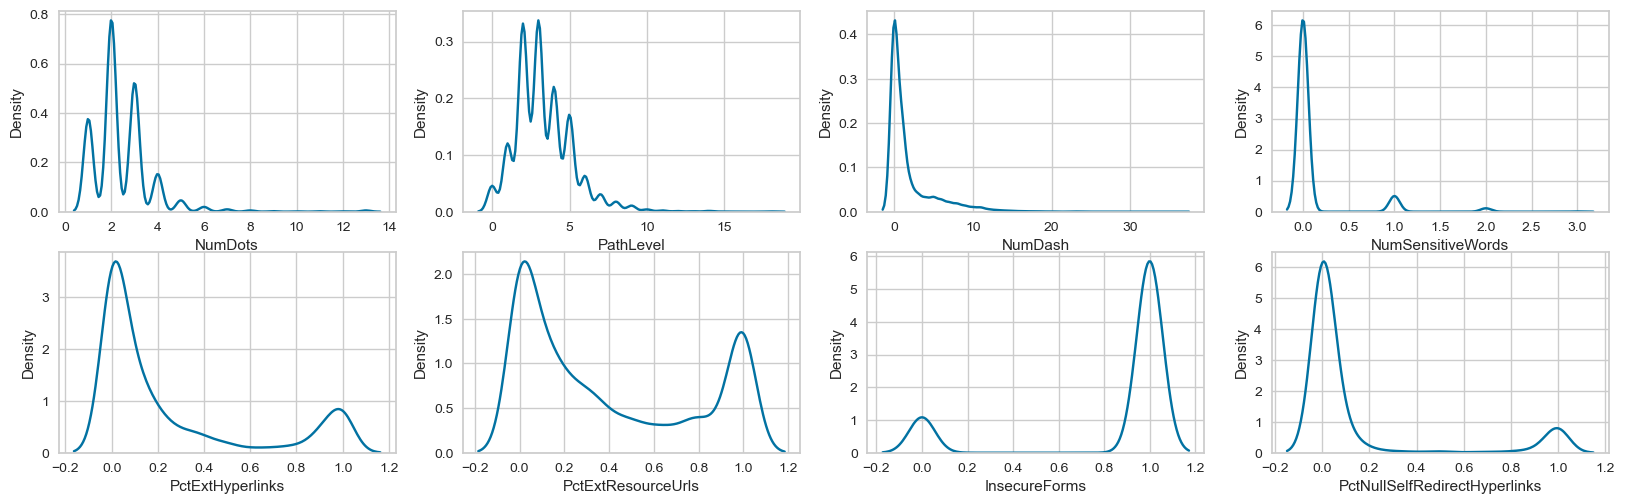

In [24]:
figure(figsize=(20, 12))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1)
    create_kde_plot(subset_fishing, list[i])

<AxesSubplot: >

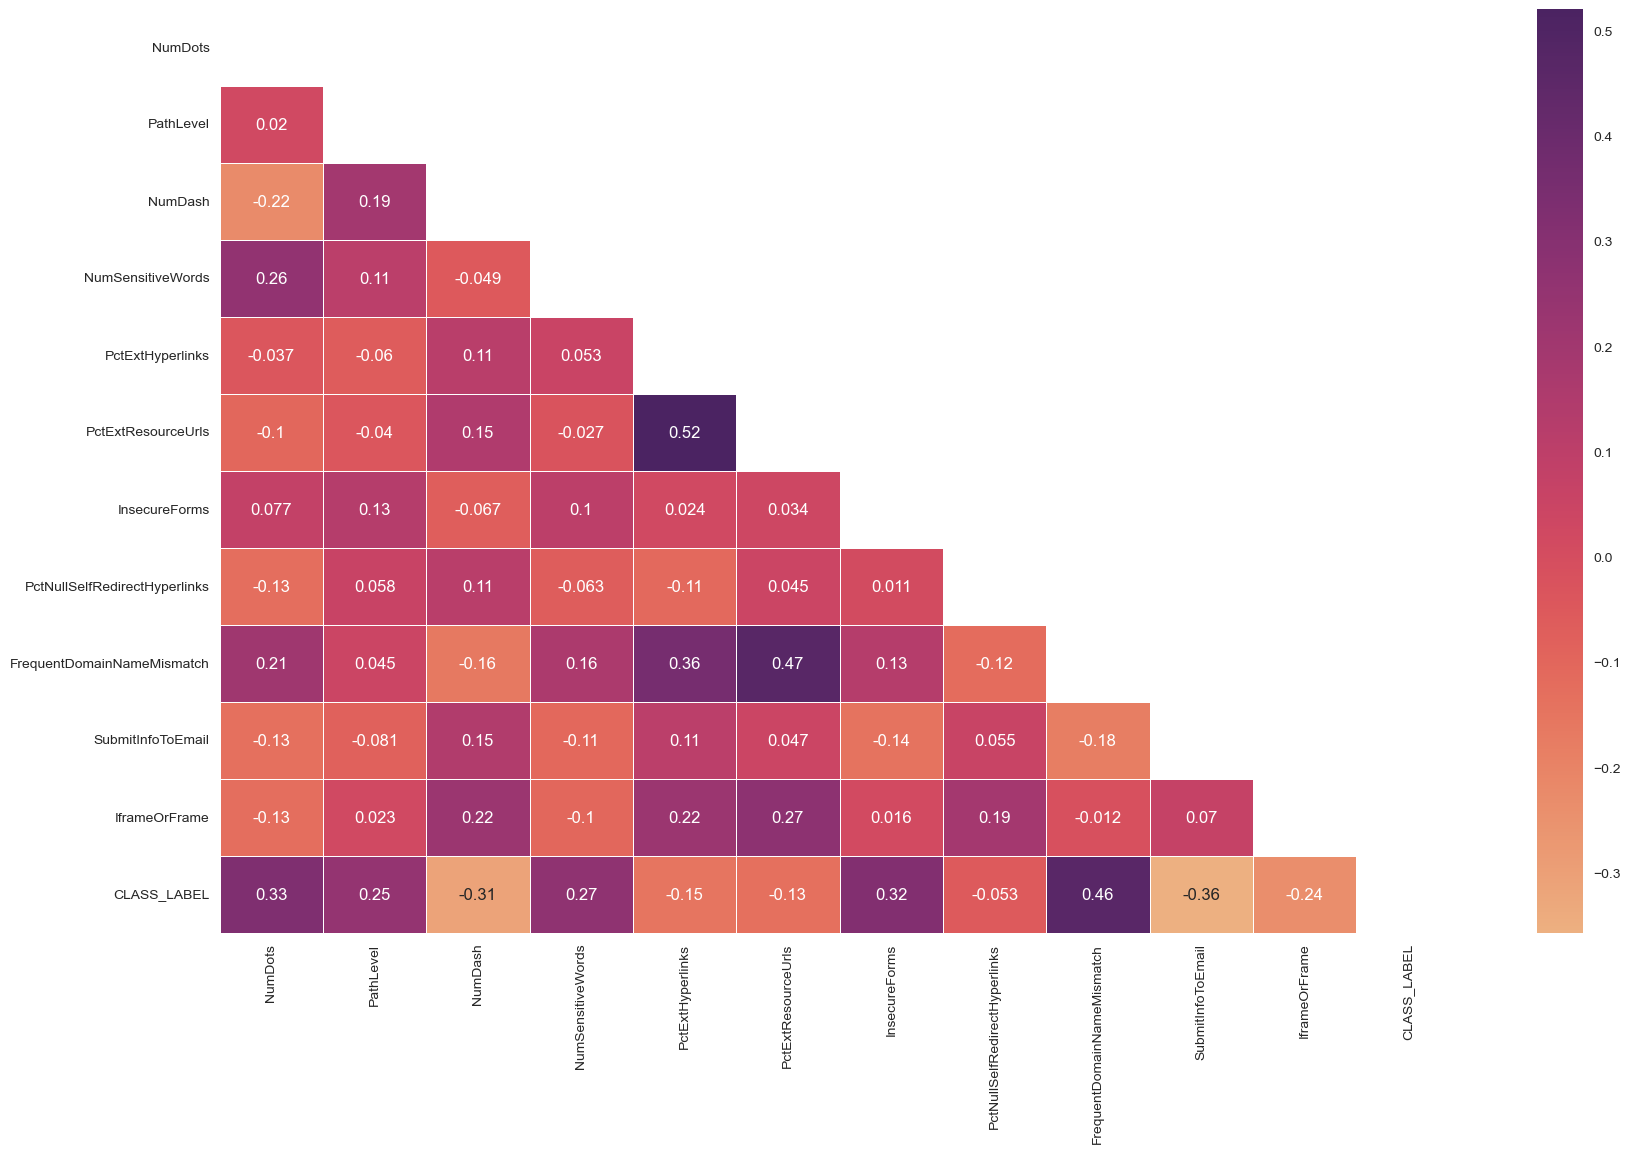

In [25]:
figure(figsize=(20, 12))
mask = np.zeros_like(subset_fishing.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(subset_fishing.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

In [26]:
models = {
    'Logistic_Regression': LogisticRegression(C=0.04, penalty='l2', solver='liblinear', max_iter=5000, multi_class='ovr'),
    'Navie_Bayes': GaussianNB(),
    'lda': LinearDiscriminantAnalysis(),
    'Random_Forest': RandomForestClassifier(n_estimators=300, criterion='gini'),
    'Ada_boost': AdaBoostClassifier(),
    'Gradient_boost': GradientBoostingClassifier(),
    'Bagging_Classifer': BaggingClassifier(n_estimators=500, max_features=0.5, max_samples=1.0),
    'knn_classifier': KNeighborsClassifier(n_neighbors=2),
    'Decision_tree': DecisionTreeClassifier(),
    'Extr_tree': ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0),
}

In [27]:
def explainable_ai(model):
    match model:
        case GaussianNB() | BaggingClassifier() | KNeighborsClassifier():
            print("Not suported")
        case _:
            fig_1 = FeatureImportances(model)
            fig_1.fit(x_train, y_train)
            fig_1.show()
            visualizer = ROCAUC(model)
            visualizer.fit(x_train, y_train)     
            visualizer.score(x_test, y_test)        
            visualizer.show()

In [29]:
accuracy = []
model_name_1 = []
def train_model(model, model_name, x=x_train, y=y_train, x_test = x_test):
    print("##########################################################################")
    model = model.fit(x, y)
    y_pred = model.predict(x_test)
    acc = model.score(x_test, y_test)
    print(model_name, ":", accuracy_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    model_name_1.append(model_name)
    print("--------------------------------------------------------------------------")
    print('--------------------------------------------------------------------------')
    report = classification_report(y_test, y_pred)
    print(report)
    explainable_ai(model)

##########################################################################
Logistic_Regression : 0.901
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1463
           1       0.89      0.92      0.91      1537

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



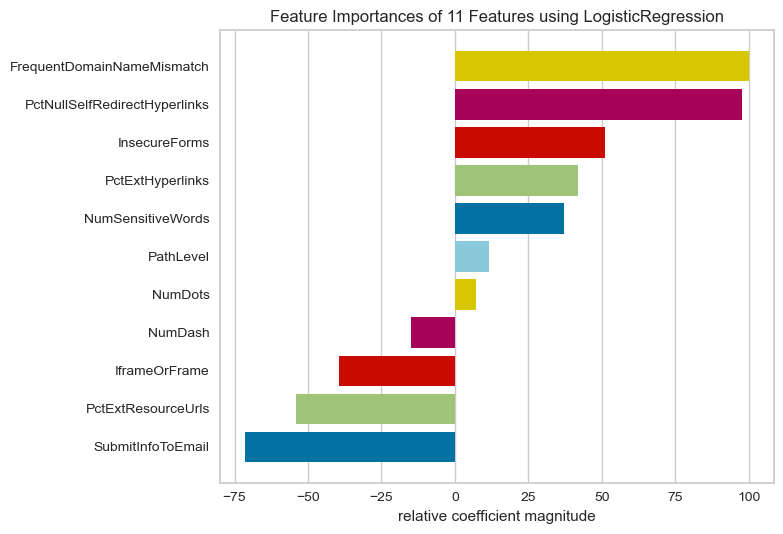

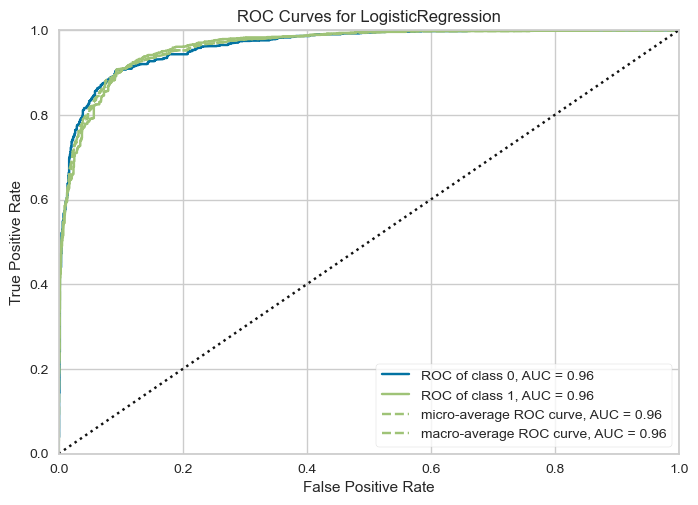

##########################################################################
Navie_Bayes : 0.836
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1463
           1       0.94      0.73      0.82      1537

    accuracy                           0.84      3000
   macro avg       0.85      0.84      0.83      3000
weighted avg       0.86      0.84      0.83      3000

Not suported
##########################################################################
lda : 0.8966666666666666
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1463
           1       0.91      0.88      0.90      1537

 

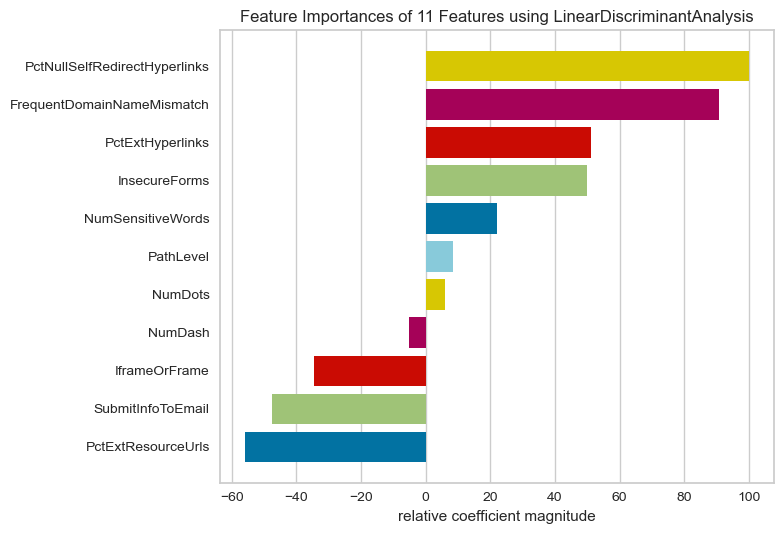

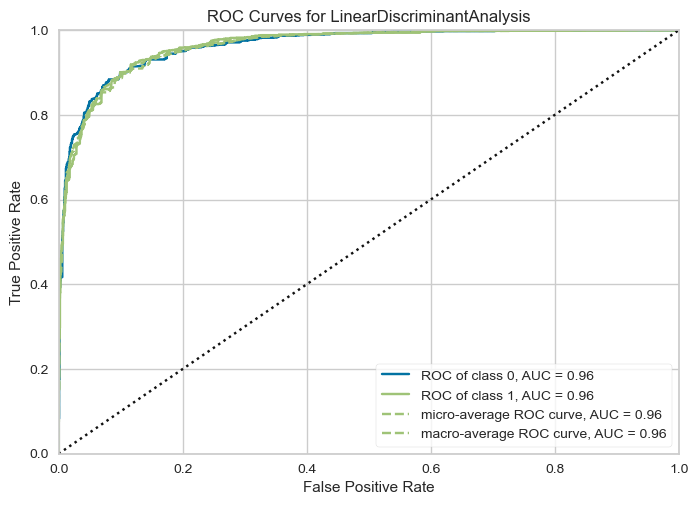

##########################################################################
Random_Forest : 0.9766666666666667
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1463
           1       0.98      0.98      0.98      1537

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



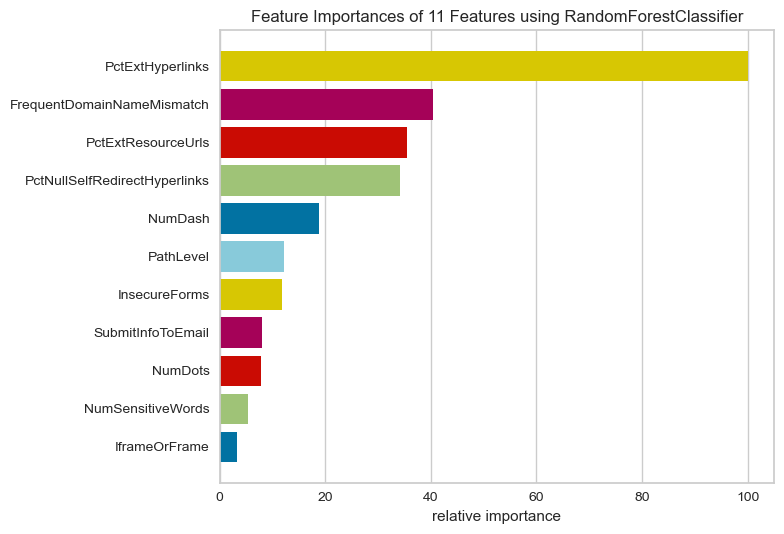

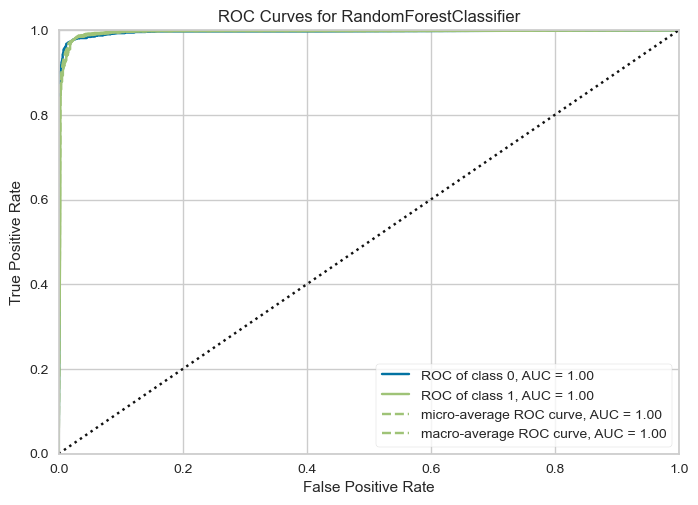

##########################################################################
Ada_boost : 0.9626666666666667
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1463
           1       0.96      0.97      0.96      1537

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



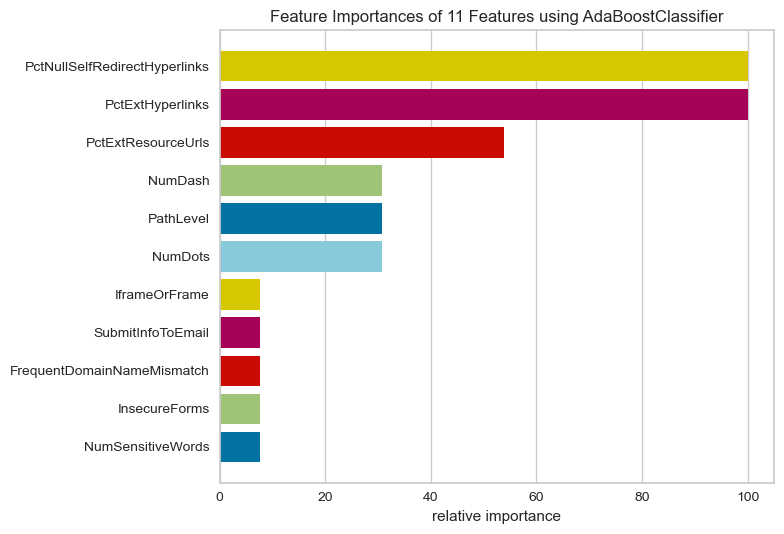

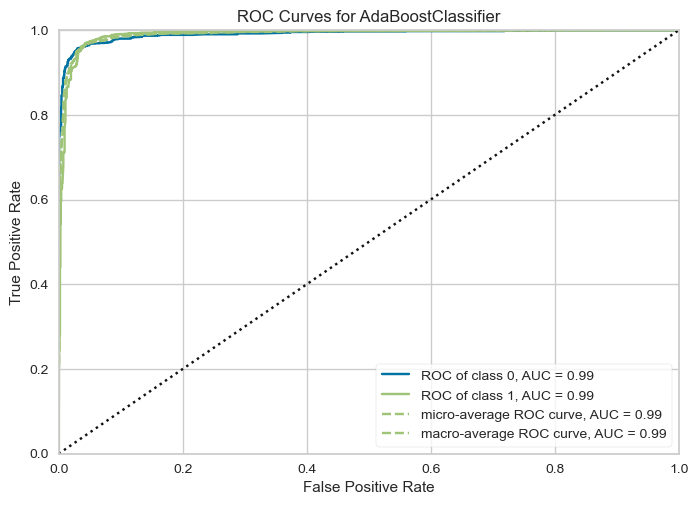

##########################################################################
Gradient_boost : 0.9716666666666667
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1463
           1       0.97      0.97      0.97      1537

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



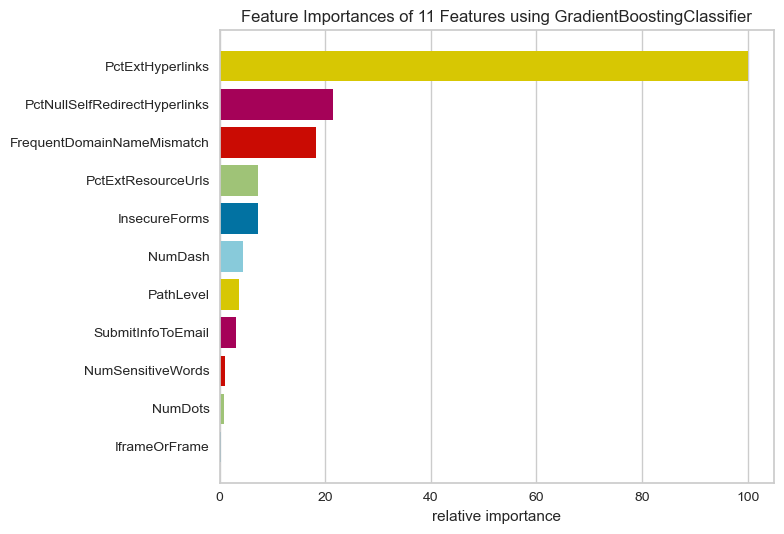

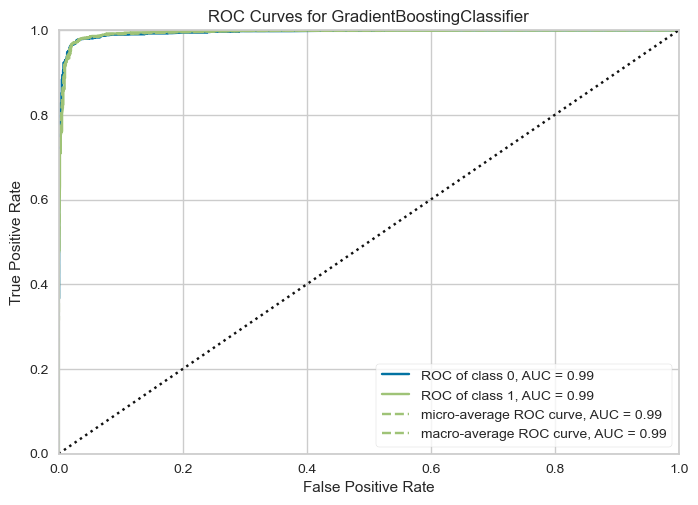

##########################################################################
Bagging_Classifer : 0.9743333333333334
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1463
           1       0.97      0.98      0.98      1537

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

Not suported
##########################################################################
knn_classifier : 0.9146666666666666
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1463
           1       0.95   

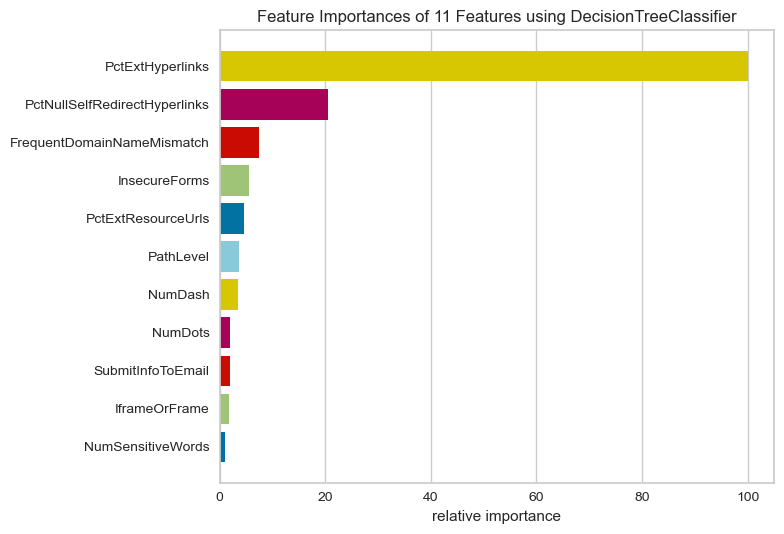

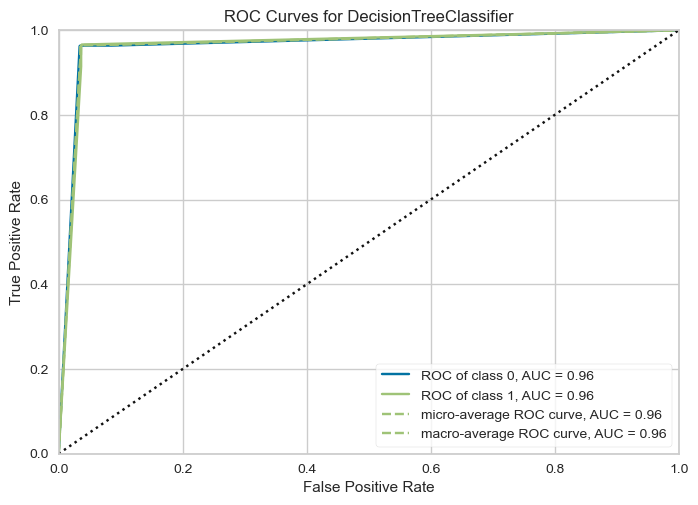

##########################################################################
Extr_tree : 0.9713333333333334
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1463
           1       0.98      0.97      0.97      1537

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



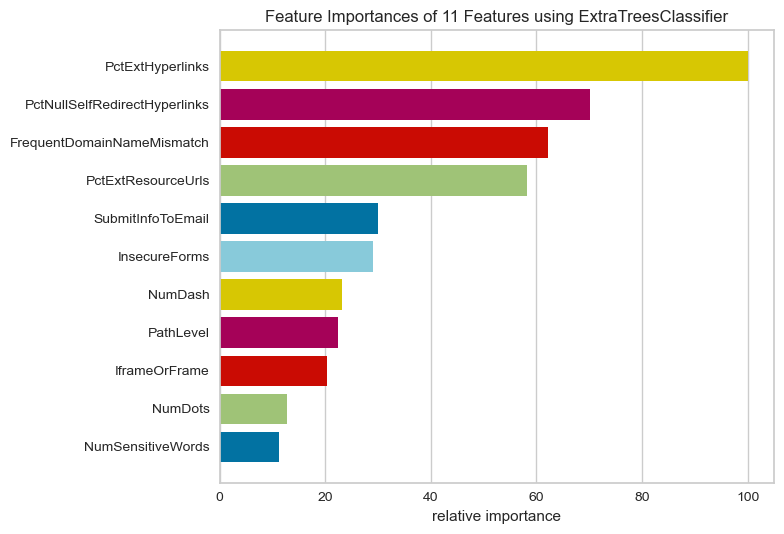

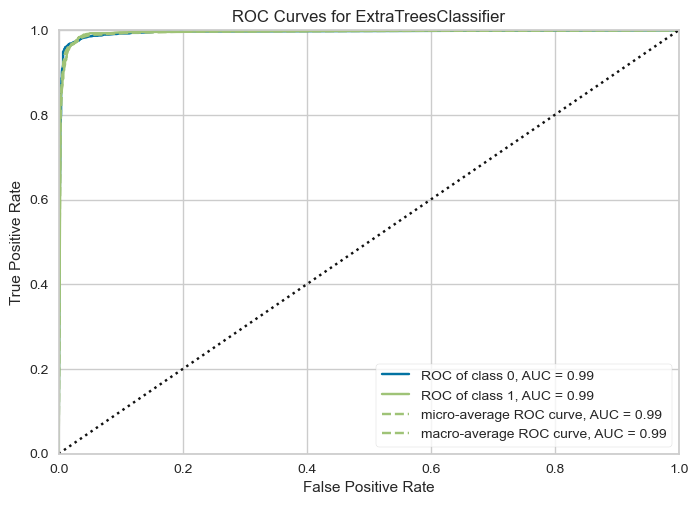

In [30]:
for model_name, model in models.items():
    train_model(model, model_name)

In [31]:
import tensorflow as tf

In [33]:
model_dl = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [34]:
model_dl.compile(optimizer='adam',
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])

In [36]:
cb_list = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)]

In [37]:
history = model_dl.fit(x_train, y_train,
                   epochs=100,
                   validation_split=0.3, callbacks=cb_list)

Epoch 1/100
154/154 [==============================] - 14s 48ms/step - loss: 0.3233 - accuracy: 0.8578 - val_loss: 0.2731 - val_accuracy: 0.8757
Epoch 2/100
154/154 [==============================] - 4s 26ms/step - loss: 0.2351 - accuracy: 0.9014 - val_loss: 0.2391 - val_accuracy: 0.9076
Epoch 3/100
154/154 [==============================] - 4s 27ms/step - loss: 0.2228 - accuracy: 0.9086 - val_loss: 0.2203 - val_accuracy: 0.9124
Epoch 4/100
154/154 [==============================] - 4s 26ms/step - loss: 0.2044 - accuracy: 0.9139 - val_loss: 0.3373 - val_accuracy: 0.8705
Epoch 5/100
154/154 [==============================] - 4s 26ms/step - loss: 0.2013 - accuracy: 0.9157 - val_loss: 0.2105 - val_accuracy: 0.9152
Epoch 6/100
154/154 [==============================] - 4s 26ms/step - loss: 0.2001 - accuracy: 0.9145 - val_loss: 0.2034 - val_accuracy: 0.9124
Epoch 7/100
154/154 [==============================] - 4s 26ms/step - loss: 0.1747 - accuracy: 0.9255 - val_loss: 0.1947 - val_accuracy

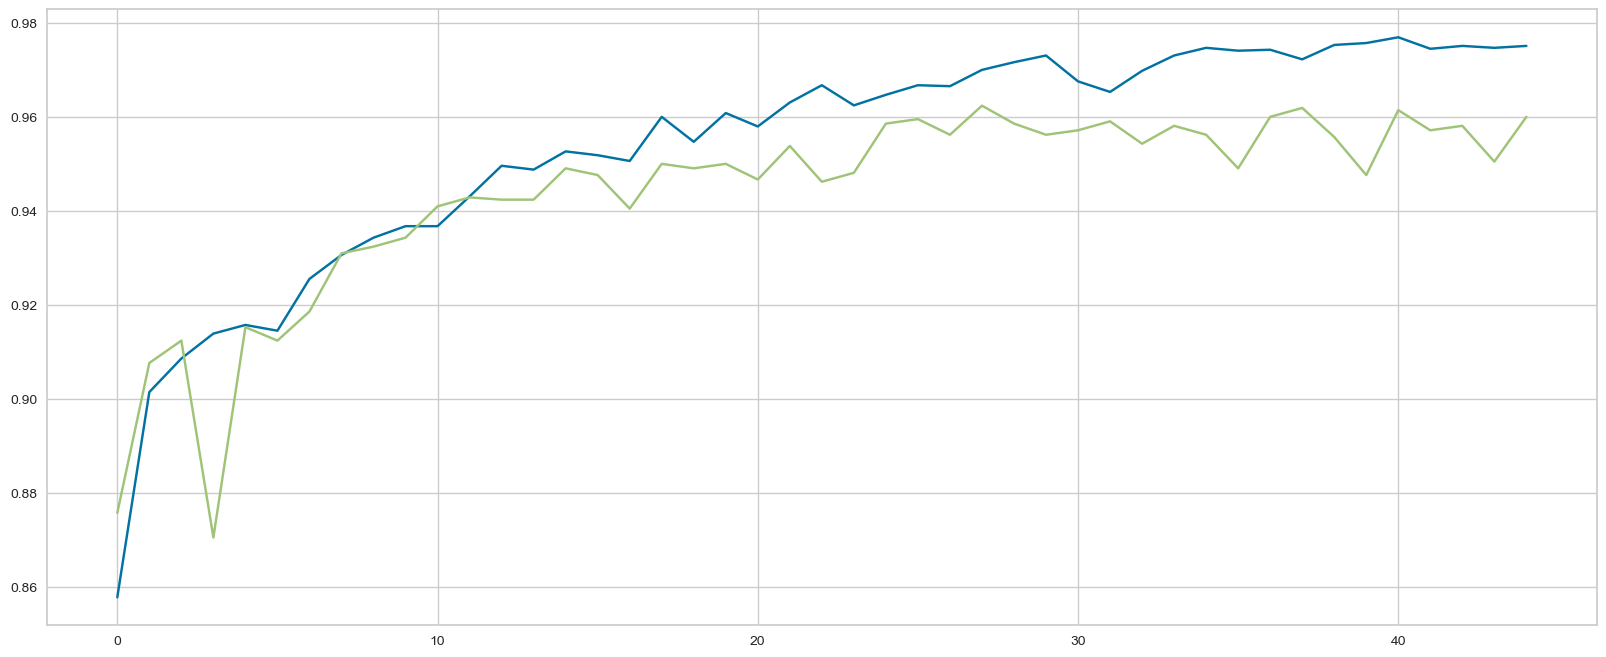

In [38]:
figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

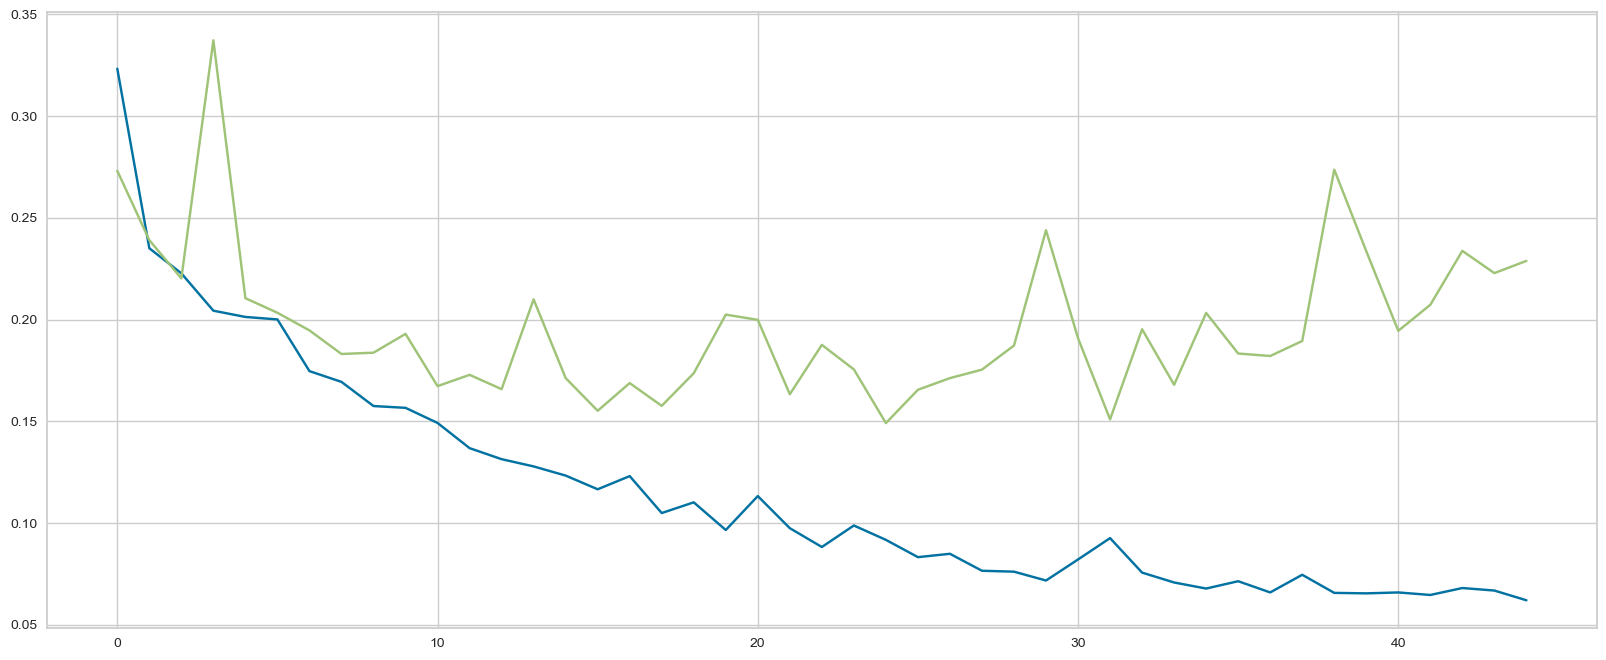

In [39]:
figure(figsize=(20, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])